In [48]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from wearsed.dataset.Recording import Recording

In [42]:
def show_diff(mesa_id):
    rec = Recording(mesa_id)
    somnolyzer_hypno = rec.hypnogram[::30]
    somnolyzer_hypno[somnolyzer_hypno == 2] = 1

    pred_hypno = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/predicted_hypnogram/mesa-{rec.id:04}-1.csv', index_col='ts')['PPG_4cl']
    pred_hypno[pred_hypno == 'W'] = 0
    pred_hypno[pred_hypno == 'N1/N2'] = 1
    pred_hypno[pred_hypno == 'N3'] = 3
    pred_hypno[pred_hypno == 'R'] = 5

    print(len(somnolyzer_hypno))
    print(len(pred_hypno))

    hypnograms = pd.DataFrame({
        'somnolyzer': pd.Series(somnolyzer_hypno.values),
        'prediction': pd.Series(pred_hypno.values - 0.1)
    })

    hypnograms.plot(figsize=(16, 4))

    # _, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 4))
    # hypnogram_somnolyzer.plot(ax=ax1)
    # hypnogram_prediction.plot(ax=ax2)
    # plt.tight_layout()

1440
1439


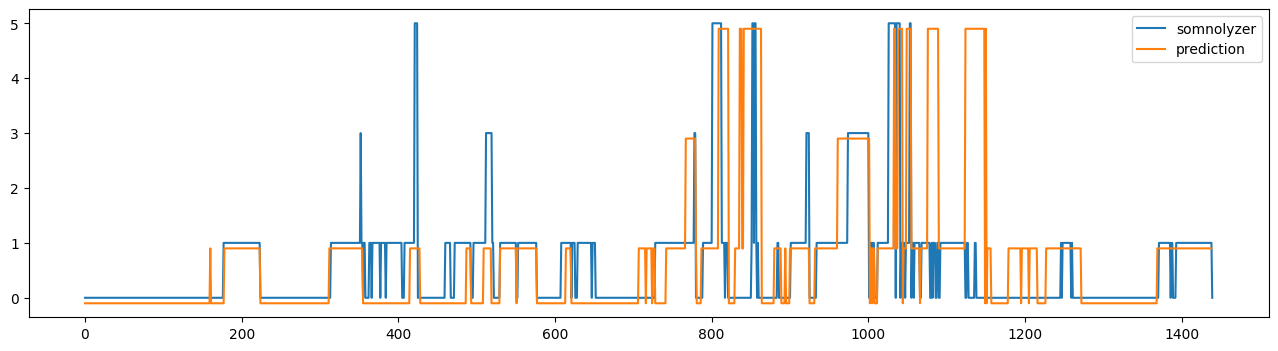

In [43]:
show_diff(1)

1014
1319


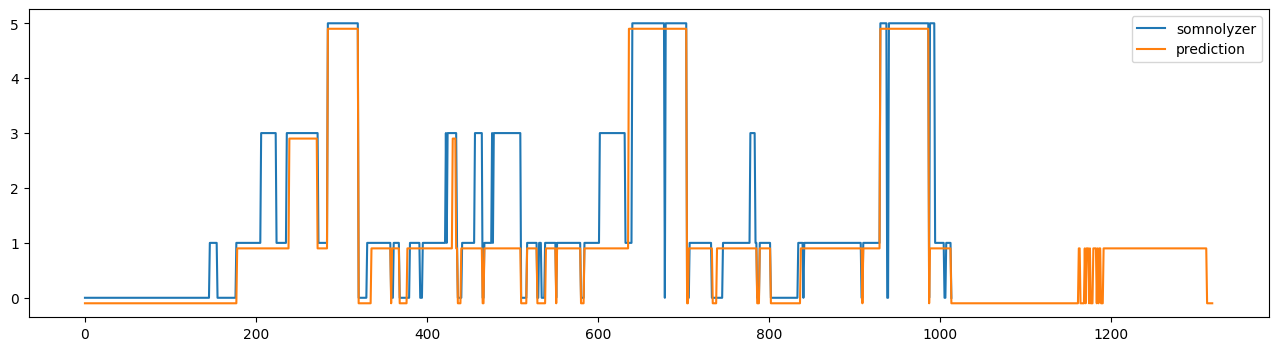

In [34]:
show_diff(2)

1145
1199


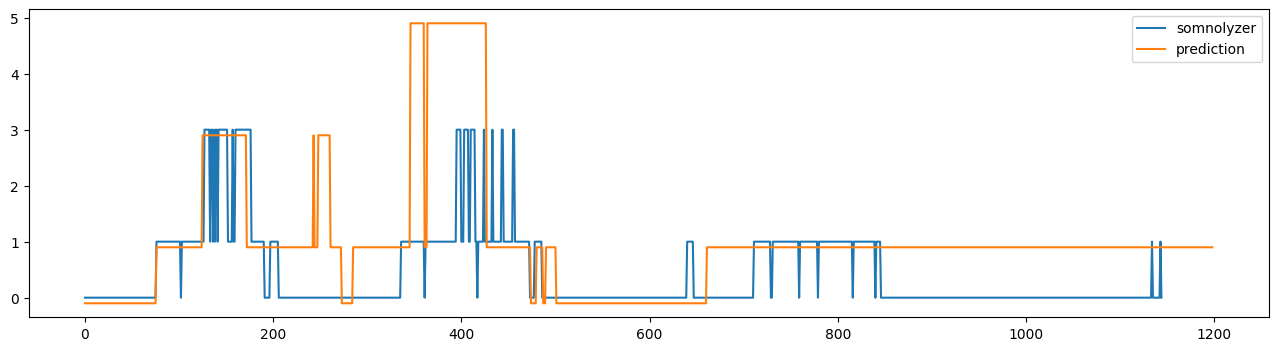

In [35]:
show_diff(10)

602
1199


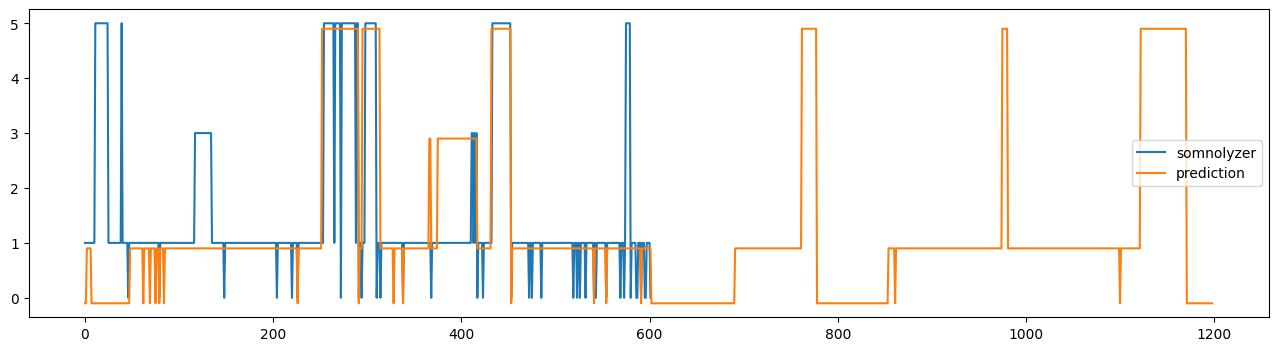

In [37]:
show_diff(1616)

1200
1199


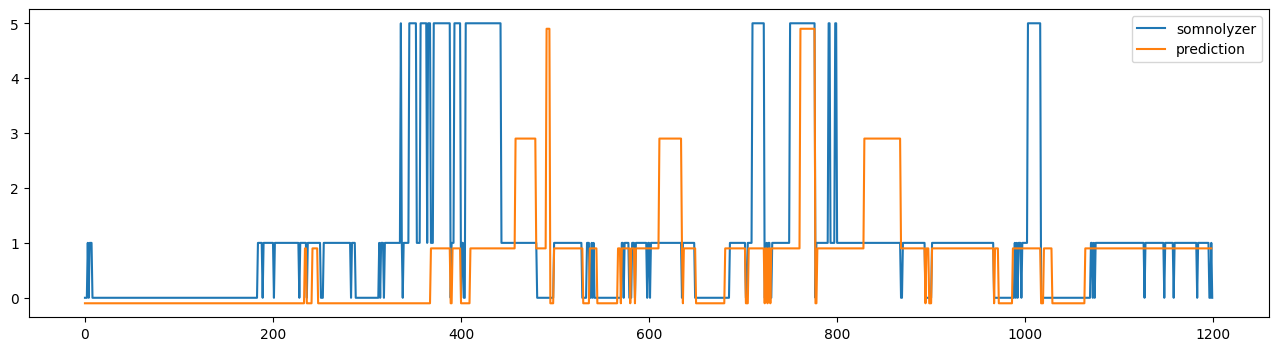

In [38]:
show_diff(5339)

1314
1319


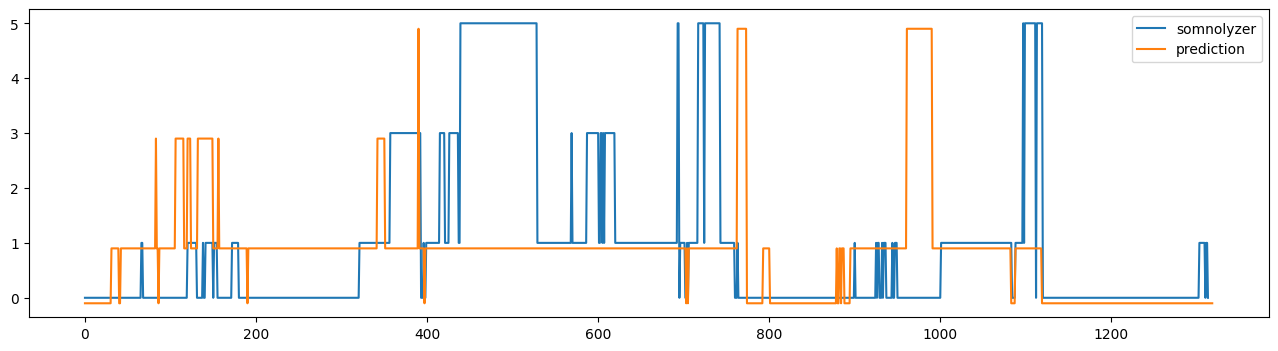

In [39]:
show_diff(6322)

### Calculate the Cohen's Kappa

In [70]:
def get_hypnograms(subject_id):
    hypnogram_somnolyzer = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/scorings/somnolyzer/hypnogram/hypnogram-{subject_id:04}.csv', header=None)[0][::30]
    hypnogram_somnolyzer[hypnogram_somnolyzer == 2] = 1

    hypnogram_prediction = pd.read_csv(f'/vol/sleepstudy/datasets/mesa/predicted_hypnogram/mesa-{subject_id:04}-1.csv', index_col='ts')['PPG_4cl']
    hypnogram_prediction[hypnogram_prediction == 'W'] = 0
    hypnogram_prediction[hypnogram_prediction == 'N1/N2'] = 1
    hypnogram_prediction[hypnogram_prediction == 'N3'] = 3
    hypnogram_prediction[hypnogram_prediction == 'R'] = 5
    hypnogram_prediction = hypnogram_prediction.astype(int)

    return pd.Series(hypnogram_somnolyzer.values), pd.Series(hypnogram_prediction.values)

In [71]:
subject_ids_somnolyzer = pd.read_csv('../wearsed/dataset/data_ids/mesa_ids_somnolyzer.csv', header=None)[0].values

hypnogram_values_somnolyzer = []
hypnogram_values_prediction = []
for subject_id in tqdm(subject_ids_somnolyzer):
    hypnogram_somnolyzer, hypnogram_prediction = get_hypnograms(subject_id)
    both_hypnogram = pd.DataFrame({ 'somnolyzer': hypnogram_somnolyzer, 'prediction': hypnogram_prediction })
    both_hypnogram.fillna(0, inplace=True)
    hypnogram_values_somnolyzer += list(both_hypnogram['somnolyzer'])
    hypnogram_values_prediction += list(both_hypnogram['prediction'])
print(len(hypnogram_values_somnolyzer), '->', len(hypnogram_values_somnolyzer) // (2*60), 'h total')

100%|██████████| 1887/1887 [00:17<00:00, 106.47it/s]

2387222 -> 19893 h total


<Axes: >

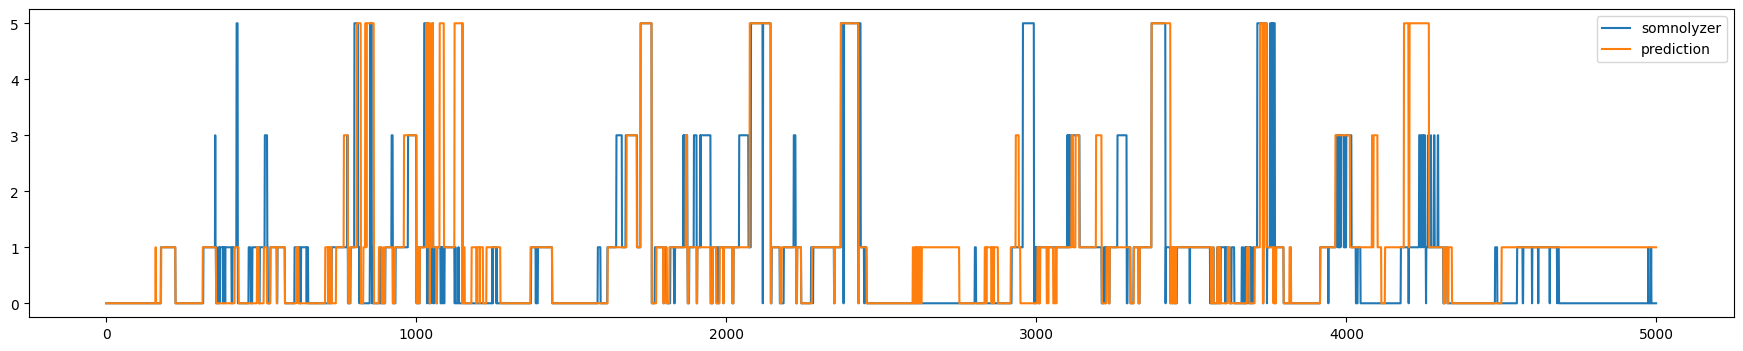

In [79]:
pd.DataFrame({ 'somnolyzer': hypnogram_values_somnolyzer, 'prediction': hypnogram_values_prediction }).iloc[:5000].plot(figsize=(22, 4))

In [80]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(hypnogram_values_somnolyzer, hypnogram_values_prediction)

np.float64(0.5499945496602796)